<a href="https://colab.research.google.com/github/2403a54121-dev/NLP/blob/main/Copy_of_Lab10_tSNE_Embeddings_A_Nalini_prabhath_2403a54121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab10_tSNE_Embeddings_A.Nalini prabhath_2403a54121**

In [1]:
!pip install gensim

# To load pre-trained word embeddings
import gensim.downloader as api

# For numerical and matrix operations
import numpy as np

# For plotting graphs
import matplotlib.pyplot as plt

# For dimensionality reduction using t-SNE
from sklearn.manifold import TSNE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 65.9 MB/s eta 0:00:00


In [2]:
print("Loading model...")

# Load 100-dimensional GloVe embeddings
model = api.load("glove-wiki-gigaword-100")

print("Model loaded successfully!")

# Print vocabulary size
print("Vocabulary Size:", len(model.key_to_index))

# Display one example vector
example_word = "computer"
print("\nExample Word:", example_word)
print("Vector (first 10 values):")
print(model[example_word][:10])


Loading model...
[==================================================] 100.0% 128.1/128.1MB downloaded
Model loaded successfully!
Vocabulary Size: 400000

Example Word: computer
Vector (first 10 values):
[-0.16298   0.30141   0.57978   0.066548  0.45835  -0.15329   0.43258
 -0.89215   0.57747   0.36375 ]


In [3]:

animals = ["cat", "dog", "lion", "tiger", "wolf",
           "elephant", "horse", "cow"]

cities = ["paris", "london", "tokyo", "delhi",
          "berlin", "rome", "mumbai", "beijing"]

technology = ["computer", "laptop", "keyboard", "mouse",
              "internet", "software", "hardware", "smartphone"]

fruits = ["apple", "banana", "mango", "orange",
          "grape", "pineapple", "pear", "peach"]

vehicles = ["car", "bus", "train", "truck",
            "bicycle", "motorcycle", "airplane", "ship"]

# Combine all words
word_list = animals + cities + technology + fruits + vehicles

# Extract vectors
vectors = []
valid_words = []

for word in word_list:
    if word in model:
        vectors.append(model[word])
        valid_words.append(word)

vectors = np.array(vectors)

print("\nTotal words selected:", len(valid_words))



Total words selected: 40


In [4]:

print("\nApplying t-SNE...")

tsne = TSNE(n_components=2, random_state=42, perplexity=5)

reduced_vectors = tsne.fit_transform(vectors)

print("Dimensionality reduced from 100D to 2D.")



Applying t-SNE...
Dimensionality reduced from 100D to 2D.


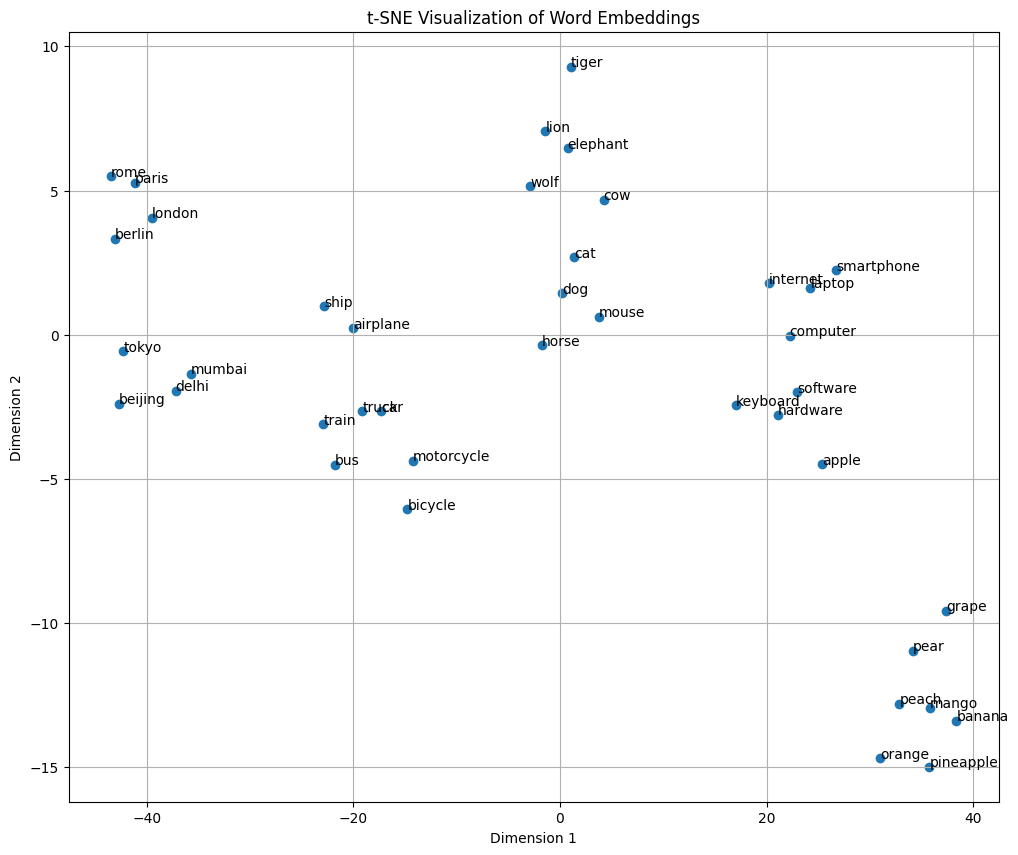

Plot saved as Lab10.4_tSNE_Output.png


In [5]:

plt.figure(figsize=(12, 10))

x = reduced_vectors[:, 0]
y = reduced_vectors[:, 1]

plt.scatter(x, y)

# Annotate each word
for i, word in enumerate(valid_words):
    plt.annotate(word, (x[i], y[i]))

plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)

plt.savefig("Lab10.4_tSNE_Output.png")
plt.show()

print("Plot saved as Lab10.4_tSNE_Output.png")
